<a href="https://colab.research.google.com/github/va-rox/ADC-LPC2148/blob/master/autoencoder_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression with Autoencoder Neural Network

https://medium.com/@weidagang/demystifying-autoencoder-in-machine-learning-75f7564cc6bc

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.3240
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1340
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1112
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.1019
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0963
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0923
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0894
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0874
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0860
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0844


Test Loss: 0.08261634409427643
Encoder model size: 440.86 KB
Decoder model size: 445.12 KB
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


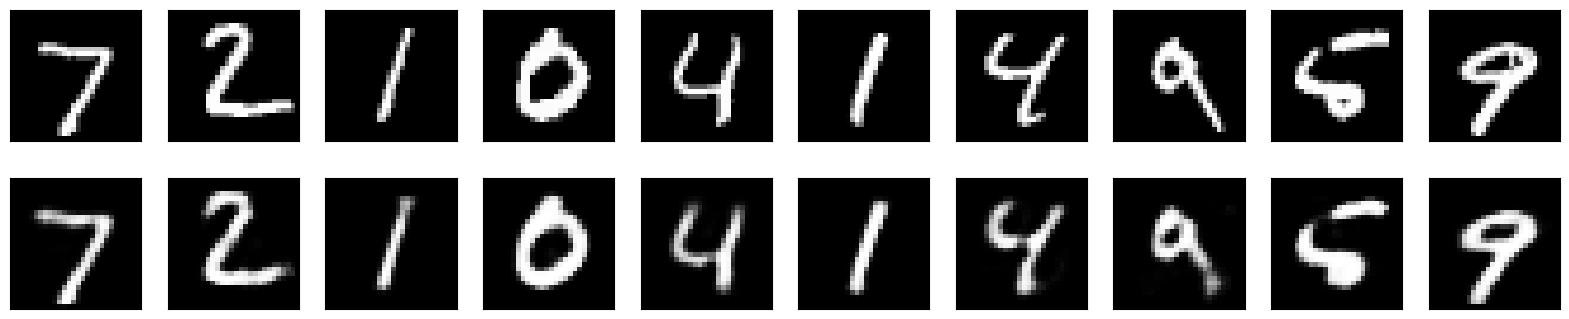

In [1]:
import os
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess images
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Encoder definition
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu')
])
# We can compile the model here, otherwise there will be a warning when it is
# used, but it is optional.

# Decoder definition
decoder = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),
    Dense(784, activation='sigmoid')
])
# We can compile the model here, otherwise there will be a warning when it is
# used, but it is optional.

# Autoencoder definition
autoencoder = Sequential([
    encoder,
    decoder
])

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256)

# Evaluation
loss = autoencoder.evaluate(x_test, x_test, verbose=0)
print("Test Loss:", loss)

# Save models
encoder_model_path = 'encoder_model.h5'
decoder_model_path = 'decoder_model.h5'

encoder.save(encoder_model_path)
decoder.save(decoder_model_path)

def get_file_size(file_path):
    size = os.path.getsize(file_path)
    for unit in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

encoder_model_size = get_file_size(encoder_model_path)
decoder_model_size = get_file_size(decoder_model_path)
print("Encoder model size:", encoder_model_size)
print("Decoder model size:", decoder_model_size)

# Load the models
loaded_encoder = keras.models.load_model('encoder_model.h5')
loaded_decoder = keras.models.load_model('decoder_model.h5')

# Use loaded models for prediction
#
# In a real deployment, the encoder will be on the server side, the decoder will
# be on the client side, and the encoded images are what's transferred from the
# server to the client.
encoded_imgs = loaded_encoder.predict(x_test)
decoded_imgs = loaded_decoder.predict(encoded_imgs)

# Visualization
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
